In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

- count len of sentences, words, text, paragraphs

In [4]:
with open("../data/MeganDiss.txt", 'r', encoding="utf8") as text:
    textfile = text.read()
#     print(textfile[:275])

In [6]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

tokenized_megan = tokenizer.tokenize(textfile)

In [11]:
tokenized_megan[6:11]

['PEER', 'AND', 'ROMANTIC', 'RELATIONSHIP', 'FUNCTIONING']

In [10]:
fdist = FreqDist(tokenized_megan)
type(fdist)
print(fdist)

<FreqDist with 5773 samples and 62998 outcomes>


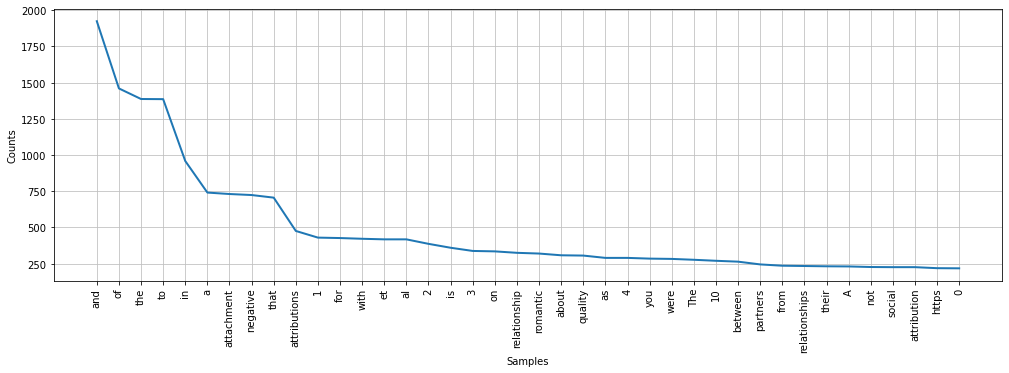

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
plt.figure(figsize=(17,5))
fdist.plot(40)

In [13]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'who', 'most', "you'd", 'did', 'up', 'am', "hadn't", 'no', 'couldn', 'all', "needn't", 'ourselves', 'off', 'didn', 'each', 'y', 'some', 'be', 'there', 'they', 'not', "hasn't", 'she', 'those', 'again', 'ma', 'wouldn', 'i', 'been', 'own', 'because', 'when', 'of', "she's", 'shan', 'hasn', 'should', 'both', "wasn't", "that'll", 'ours', 'hers', 'were', 'on', 'aren', 'our', 'was', 'this', 'an', 'under', 'or', 'other', 'yourselves', 'me', 'yours', "you've", 'into', 'doesn', "you're", 'won', 'just', 'during', 'above', 'for', 'any', 'the', 'very', "isn't", 'your', 'hadn', 'against', "you'll", 'where', "haven't", 'had', 'do', 'until', 'it', "mustn't", 'same', 'over', 'has', 's', "it's", 'that', 'her', 'whom', 'o', "doesn't", 'we', 'itself', 't', 'himself', 'down', "should've", 'than', 'as', 'these', 'further', 'can', 'does', 'now', 'wasn', "wouldn't", 'shouldn', "shan't", 'below', 'you', 'if', 'too', 'is', 'ain', 'after', 'their', 'doing', 'once', 'then', "weren't", 'him', 'from', 've', 'mustn'

In [47]:
import string

#adding additional words I don't find to be that valuable
additional_stopwords = ['https', 'I', 'com', 'http', 'RT', 'co', 'the', 'amp', 'the', 'lt', 'A', 'www', 'rt', 'got', 'get', 
                        'ly', 'u', 'In', 'in', 'The', 'the', 'Ibid', 'A', 'B', 'S', 'T', 'R', 'A', 'C','T', 't','i','t','l','e',
                        'o','f','D','i','s','s','e', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
                       's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'U',
                       'V', 'W', 'X', 'Y', 'Z', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '0', 'et', 
                        'al', 'org', 'doi', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '001', '2018', 
                        '2019', '2020', '2021']

stop_words = stopwords.words('english')

stop_words += list(string.punctuation)

stop_words += additional_stopwords

In [48]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
filtered_megan=[]
for w in tokenized_megan:
    if w not in stop_words:
        filtered_megan.append(w)
# print("Filterd Sentence:",filtered_review)

In [50]:
print(len(tokenized_megan))
print(len(filtered_megan))

62998
37849


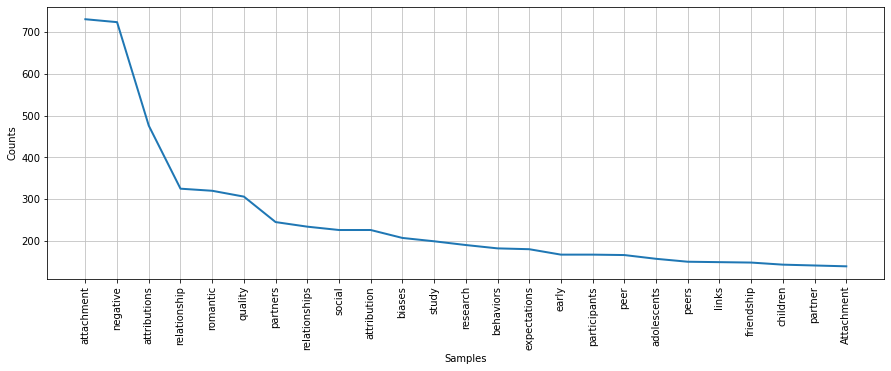

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [51]:
fdist = FreqDist(filtered_megan)
plt.figure(figsize=(15,5))
fdist.plot(25)

In [52]:
fdist.most_common(25)

[('attachment', 731),
 ('negative', 724),
 ('attributions', 476),
 ('relationship', 325),
 ('romantic', 320),
 ('quality', 306),
 ('partners', 245),
 ('relationships', 234),
 ('social', 226),
 ('attribution', 226),
 ('biases', 207),
 ('study', 199),
 ('research', 190),
 ('behaviors', 182),
 ('expectations', 180),
 ('early', 167),
 ('participants', 167),
 ('peer', 166),
 ('adolescents', 157),
 ('peers', 150),
 ('links', 149),
 ('friendship', 148),
 ('children', 143),
 ('partner', 141),
 ('Attachment', 139)]

In [31]:
fdist

FreqDist({'attachment': 731, 'negative': 724, 'attributions': 476, 'relationship': 325, 'romantic': 320, 'quality': 306, 'partners': 245, 'relationships': 234, 'social': 226, 'attribution': 226, ...})

In [33]:
type(fdist.most_common(25))

list

In [57]:
# from fdist.most_common(25) seperate words and counts
megan_words = [x[0] for x in fdist.most_common(25)]
print(megan_words)
megan_counts = [x[1] for x in fdist.most_common(25)]
print(megan_counts)

['attachment', 'negative', 'attributions', 'relationship', 'romantic', 'quality', 'partners', 'relationships', 'social', 'attribution', 'biases', 'study', 'research', 'behaviors', 'expectations', 'early', 'participants', 'peer', 'adolescents', 'peers', 'links', 'friendship', 'children', 'partner', 'Attachment']
[731, 724, 476, 325, 320, 306, 245, 234, 226, 226, 207, 199, 190, 182, 180, 167, 167, 166, 157, 150, 149, 148, 143, 141, 139]


In [88]:
#figured out how to slice from most common!
# most_common_slice = fdist.most_common(100)
# x[26:60]

In [56]:
# megan_words = [x[0] for x in fdist.most_common()[101:140]]
# # print(megan_words)
# megan_counts = [x[1] for x in fdist.most_common()[101:140]]
# # print(megan_counts)

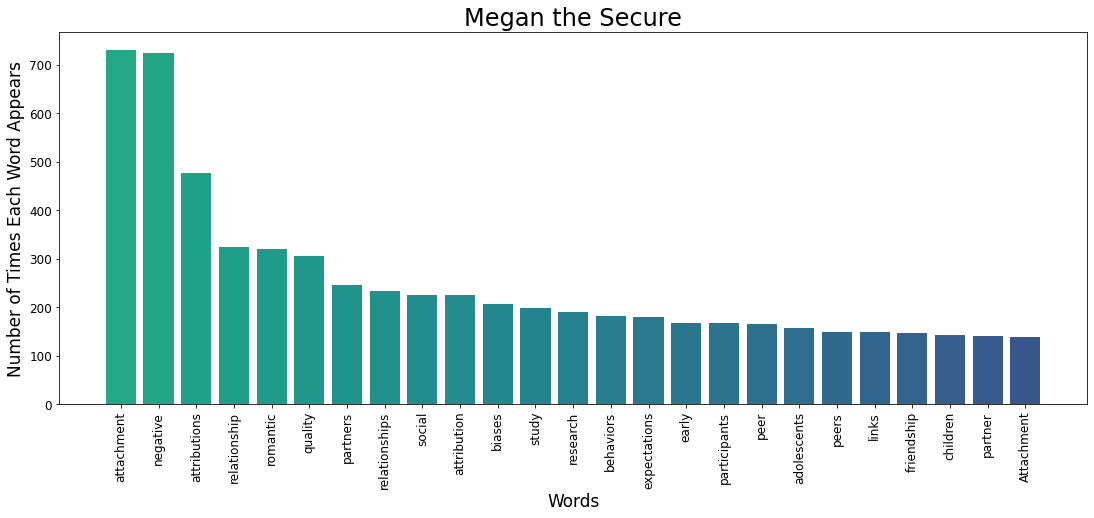

In [58]:
fig, ax = plt.subplots(1,1, figsize=(15,7))

# matplotlib bar plot
ax.bar(megan_words, megan_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Number of Times Each Word Appears', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Megan the Secure", fontsize = 24)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up

# plt.savefig('../graphs/megan.png')

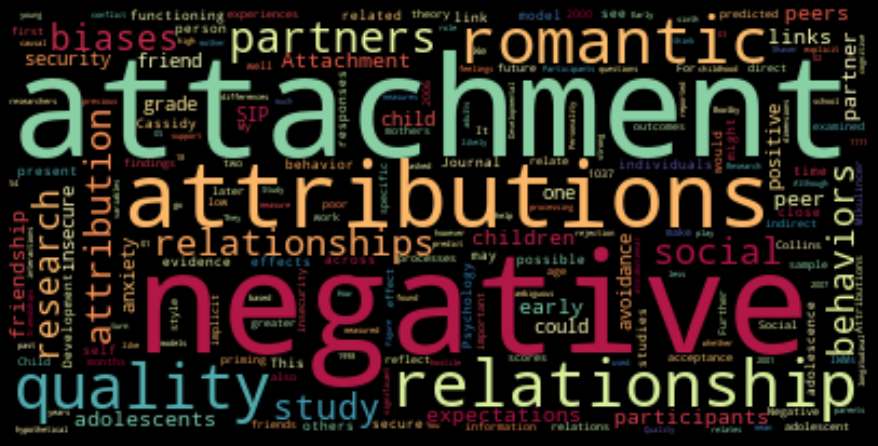

In [59]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(12,8), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [72]:
# implementing it in python
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts

vec = CountVectorizer(stop_words=None)
X = vec.fit_transform([textfile])


df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df = df.transpose()

In [61]:
pd.options.display.max_seq_items = None
# df.columns

In [75]:
df.loc[['negative']]

,0
negative,791


In [87]:
df = df.reset_index()

In [89]:
df.columns

Index(['index', 0], dtype='object')

In [110]:
df = df.rename(columns={'index':'word', 0:'times'})
df.head()

,word,times
0,00,10
1,000,1
2,00004583,1
3,00013,1
4,00058,1


In [112]:
df['times'].sort_values(ascending=False)

968     1928
4618    1668
3439    1465
4679    1400
2685    1056
        ... 
2726       1
1526       1
1527       1
2724       1
2528       1
Name: times, Length: 5057, dtype: int64

In [109]:
df[0].value_counts(ascending=False)

1       2096
2        771
3        404
4        248
5        207
        ... 
130        1
142        1
146        1
154        1
1465       1
Name: 0, Length: 163, dtype: int64

In [106]:
df[df['word'].isin(df[0].sort_values(ascending=False))]

,word,0


In [98]:
# df_g = df.groupby(['word']).nunique()

In [103]:
# df_g.reset_index()

In [101]:
df_g[df_g[0] > 2]

,0
index,
